| Variable Name | Variable Description | Variable Type | 
| --- | --- | -- |
| Category | Category of the product ordered | object |
| City | City of residence of the Customer | object |
| Country | Country of residence of the Customer | object |
| Customer ID | Unique ID to identify each Customer | object |
| Customer Name | Name of the Customer | object |
| Discount | Discount provided | float64 |
| Order Date | Order Date of the product | object |
| Order ID | Unique Order ID for each Customer | object |
| Order Piority |  | object | 
| Product ID | Unique ID of the Product | object |
| Product Name | Name of the Product | object |
| Profit | Profit/Loss incurred | float64 |
| Quantity  | Quantity of the Product | int64 |
| Region | Region where the Customer belong | object |
| Row ID | Unique ID for each row | int64 |
| Sales | Sales of the Product | int64 |
| Segment | The segment where the Customer belongs | object |
| Ship Date | Shipping Date of the Product | object |
| Ship Mode | | object |
| Shipping.Cost |  |float64 |
| State |  | object |
| Sub.Category |  | object |
| Year | | int64 |
| Market2 | | object |
| weeknum |  | int64 |

*****

### Data Exploratory Analysis

In [1]:
#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics.pairwise import pairwise_distances

# pip install "numpy<1.24"
# pip install networkx
# pip install scikit-learn  -U

# so I can check the rows in more details
pd.set_option('display.max_rows', 500)

**This consider the original dataset I'll be working on**

In [2]:
# output the dataset
df = pd.read_csv('https://raw.githubusercontent.com/RonySoliman/Kaggle-Projects/main/superstore.csv',on_bad_lines='skip')

**Understand the dimension of the dataset is important, this dataset is large with many observations, following up with checking the columns types, Types of columns are numerical [int64 or float64] and object [default type of variable].**

In [3]:
# check the number of rows and columns of the original dataset
df.shape

(51290, 27)

In [4]:
# building the info function to check the dtype of each column and check the number of NULL values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        51290 non-null  object 
 1   City            51290 non-null  object 
 2   Country         51290 non-null  object 
 3   Customer.ID     51290 non-null  object 
 4   Customer.Name   51290 non-null  object 
 5   Discount        51290 non-null  float64
 6   Market          51290 non-null  object 
 7   记录数             51290 non-null  int64  
 8   Order.Date      51290 non-null  object 
 9   Order.ID        51290 non-null  object 
 10  Order.Priority  51290 non-null  object 
 11  Product.ID      51290 non-null  object 
 12  Product.Name    51290 non-null  object 
 13  Profit          51290 non-null  float64
 14  Quantity        51290 non-null  int64  
 15  Region          51290 non-null  object 
 16  Row.ID          51290 non-null  int64  
 17  Sales           51290 non-null 

### Data Wrangling

> Includes data cleaning and some feature engineering.

***I need to understand/highlight the data cleaning and feature engineering so I write about in the thesis***

#### How can data cleaning and features engineering help my work?

| Aims | Data Cleaning | Features Engineering | 
| :- | :- | :- |
| Purpose | Handles existing variables and handles data errors | Creates new variables by transforming current variables | 
| Usage Impact | Makes the data consistent | Makes the prediction more feasible |
| Functionality | Increase the accuracy and validity of the data afterwards | interpret in improving the model performance |
| Techniques (for variables) | Renaming, converting data types, manipulating date variable | creating new features, features labeling, one hot encoding, scaling |

In [6]:
#rename the columns
df.columns = ['Category', 'City', 'Country', 'CustomerID', 'CustomerName',
       'Discount', 'Market', '记录数','OrderDate', 'OrderID', 'OrderPriority',
       'ProductID', 'ProductName', 'Profit', 'Quantity', 'Region', 'RowID',
       'Sales', 'Segment', 'ShipDate', 'ShipMode', 'ShippingCost', 'State',
       'SubCategory', 'Year', 'Market2', 'weeknum']

In [7]:
# modify the date columns

#change these columns into dates:
df['OrderDate'] = pd.to_datetime(df['OrderDate'], errors='coerce')
df['ShipDate'] = pd.to_datetime(df['ShipDate'], errors='coerce')

# check the column name, if i exists in columns >> change the column to string then loop on the next 
#change the next columns into strings:
columns = df[['Category','City','Country','CustomerID','CustomerName','Market','OrderID','OrderPriority','Segment',
             'ShipMode','State','SubCategory','Market2','ProductID','ProductName','Region']]
# to iterate over the 'object' column to change into string type
for i in columns:
    df[i] = df[i].astype('string')

In [8]:
# create this column for more understanding! might delete it later or the year colu.
df['DaysofOrderPreparation'] = (df['ShipDate'] - df['OrderDate']).dt.days

In [9]:
# create rating column
start = 1 #highlight the starting point
end = 10 #highlight the end point
width = end - start  #here we identify the scale between the starting point and end point
rating = round((df['Quantity'] - df['Quantity'].min())/(df['Quantity'].max() - df['Quantity'].min()) * width + start).astype(int)
df['Rating'] = rating #merge the new column into the original dataset

In [11]:
# create top items

top_items = df.groupby("Country")['Rating'].sum().sort_values(ascending=False).to_frame().reset_index().head(50)

In [12]:
#download it as image and include it in references

# importing required module
import plotly.express as px
# to have a same origin
top_items["all"] = "Top 50 items" 
# creating tree map using plotly

fig = px.treemap(top_items.head(50), path=['all', "Country"], values='Rating',
                  color=top_items["Rating"].head(50), hover_data=['Country'],
                  color_continuous_scale='Blues',
                )
# ploting the treemap
fig.show() 

In [13]:
#drop unnecessary columns 
df.drop(['City','Country','OrderDate','ShipDate','weeknum','Market2','ProductID','Region',
         'State','Quantity','OrderID','Category','SubCategory','CustomerName','记录数','RowID'],axis=1,inplace = True)

#columns I will delete: customername, shipdate, country,city,orderdate, delete rowId for now,ProductID,
#columns I will encode: market,Segment,OrderPriority,ShipMode via ONE or label encoding
#Quantity: deleted as I replaced it by rating column
#work on customerID


#modify the customerID to more manageable structure
df['CustomerID'] = df['CustomerID'].str.replace('-','') #done hope this works!

In [15]:
# One hot encoding:
df = pd.get_dummies(df, columns=['Market'])

#label encoding
df['OrderPriority'] = df['OrderPriority'].replace(['Critical','High','Medium','Low'],['1','2','3','4']).astype(int)
df['Segment'] = df['Segment'].replace(['Consumer','Corporate','Home Office'],['0','1','2']).astype(int)
df['ShipMode'] = df['ShipMode'].replace(['Standard Class','First Class','Second Class','Same Day'],['0','1','2','3']).astype(int)

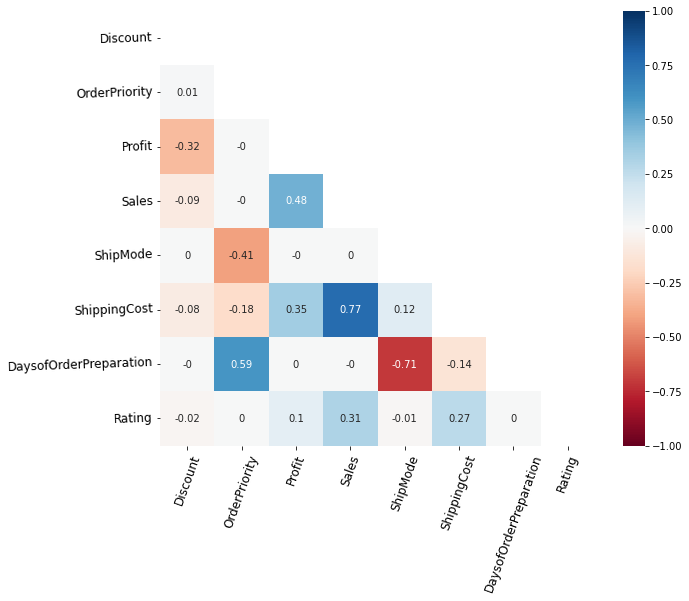

In [17]:
# Plot masked heatmap
df_hm = df[['Discount','OrderPriority','Profit','Sales','ShipMode','ShippingCost',
            'DaysofOrderPreparation','Rating']]
matrix = df_hm.corr().round(2)
mask = np.triu(np.ones_like(matrix, dtype=bool))
plt.figure(figsize=(10,8))
sns.heatmap(matrix, vmin =-1, vmax=1, cmap='RdBu', square=True, annot=True, mask=mask)
plt.xticks(fontsize=12,rotation=70)
plt.yticks(fontsize=12,rotation=2)
plt.show()

*****


<h6 style="background-color:#f9f1fe; color:#000; font-size:18px; padding:20px; text-align:center; border-radius:15px; font-family:'Verdana', sans-serif;"> Apriori </h6>
    

In [18]:
#selecting the 

apriori = df.pivot_table(index='CustomerID',columns='ProductName',values='Rating')

In [19]:
#
apriori.fillna(0,inplace = True)

In [20]:
#convert the values into zeros & ones. 

def rating_matrix_apriori(item_freq):
    res = 0
    if item_freq > 0:
        res = 1
    return res
    
basket_input_apriori = apriori.applymap(rating_matrix_apriori)

In [21]:
#
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

#
frequent_itemsets_apriori = apriori(basket_input_apriori, min_support=0.001,use_colnames=True,low_memory=True)
rules_apriori = association_rules(frequent_itemsets_apriori, metric="lift")
rules_apriori
# https://365datascience.com/tutorials/python-tutorials/market-basket-analysis/

antecedents  \
0                  (Acco Hole Reinforcements, Durable)   
1                             (Ibico Index Tab, Clear)   
2                                            (Staples)   
3    (Acco Pressboard Covers with Storage Hooks, 14...   
4               (Advantus Paper Clips, Assorted Sizes)   
5                             (Ibico Index Tab, Clear)   
6                       (Apple Smart Phone, Full Size)   
7                     (Fellowes File Cart, Wire Frame)   
8                                            (Staples)   
9    (Avery 4027 File Folder Labels for Dot Matrix ...   
10                               (Avery Binder, Clear)   
11                    (Rogers File Cart, Single Width)   
12                     (Eldon File Cart, Single Width)   
13                            (Avery Index Tab, Clear)   
14                            (Avery Index Tab, Clear)   
15             (Stanley Pencil Sharpener, Water Color)   
16                                           (Staples)   
17                           (Avery Non-Stick Binders)   
18                     (Smead File Cart, Single Width)   
19                 (BIC Pencil Sharpener, Water Color)   
20   (Belkin F9H710-06 7 Outlet SurgeMaster Surge P...   
21                                           (Staples)   
22                                           (Staples)   
23   (Binney & Smith Crayola Metallic Colored Penci...   
24                               (Eldon Lockers, Blue)   
25              (Boston Pencil Sharpener, Water Color)   
26                     (Cardinal Binder Covers, Clear)   
27                    (Rogers File Cart, Single Width)   
28              (GlobeWeis Manila Envelope, Set of 50)   
29                         (Cardinal Index Tab, Clear)   
30                     (Tenex File Cart, Single Width)   
31                         (Cardinal Index Tab, Clear)   
32                                           (Staples)   
33   (Carina Double Wide Media Storage Towers in Na...   
34                (Chromcraft Round Conference Tables)   
35                                           (Staples)   
36           (DAX Black Cherry Wood-Tone Poster Frame)   
37                                           (Staples)   
38                                           (Staples)   
39                             (Digium D40 VoIP phone)   
40                 (Kleencut Letter Opener, Easy Grip)   
41                     (Eldon File Cart, Single Width)   
42                                           (Staples)   
43                            (Flat Face Poster Frame)   
44                                           (Staples)   
45        (GBC DocuBind TL300 Electric Binding System)   
46                                           (Staples)   
47                         (GBC Plastic Binding Combs)   
48                  (GBC Standard Therm-A-Bind Covers)   
49                                           (Staples)   
50                                           (Staples)   
51                           (GBC VeloBind Cover Sets)   
52                            (GBC Wire Binding Combs)   
53                                           (Staples)   
54                   (Global Ergonomic Managers Chair)   
55                                           (Staples)   
56                            (Hon GuestStacker Chair)   
57                                           (Staples)   
58                    (Hot File 7-Pocket, Floor Stand)   
59                                           (Staples)   
60   (I Need's 3d Hello Kitty Hybrid Silicone Case ...   
61                                           (Staples)   
62                       (OIC Staples, Assorted Sizes)   
63                      (Ibico 3-Hole Punch, Recycled)   
64                    (Rogers File Cart, Single Width)   
65                             (Ibico Binder, Economy)   
66                         (Smead Folders, Wire Frame)   
67                            (Ibico Index Tab, Clear)   
68                (Ibico Plastic Spiral B

In [22]:
#modify the name, and this step is essential to display the important pair itemsets 

apriori_items_output = frequent_itemsets_apriori[frequent_itemsets_apriori['itemsets'].apply(lambda x: len(x)) > 1]
apriori_items_output

support                                           itemsets
2960  0.001026  (Acco Hole Reinforcements, Durable, Ibico Inde...
2961  0.001026  (Staples, Acco Pressboard Covers with Storage ...
2962  0.001026  (Advantus Paper Clips, Assorted Sizes, Ibico I...
2963  0.001026  (Apple Smart Phone, Full Size, Fellowes File C...
2964  0.001026  (Staples, Avery 4027 File Folder Labels for Do...
2965  0.001026  (Avery Binder, Clear, Rogers File Cart, Single...
2966  0.001231  (Eldon File Cart, Single Width, Avery Index Ta...
2967  0.001026  (Avery Index Tab, Clear, Stanley Pencil Sharpe...
2968  0.001436                 (Staples, Avery Non-Stick Binders)
2969  0.001231  (Smead File Cart, Single Width, BIC Pencil Sha...
2970  0.001026  (Belkin F9H710-06 7 Outlet SurgeMaster Surge P...
2971  0.001026  (Staples, Binney & Smith Crayola Metallic Colo...
2972  0.001026  (Eldon Lockers, Blue, Boston Pencil Sharpener,...
2973  0.001026  (Cardinal Binder Covers, Clear, Rogers File Ca...
2974  0.001026  (GlobeWeis Manila Envelope, Set of 50, Cardina...
2975  0.001231  (Tenex File Cart, Single Width, Cardinal Index...
2976  0.001231  (Staples, Carina Double Wide Media Storage Tow...
2977  0.001231      (Chromcraft Round Conference Tables, Staples)
2978  0.001026  (DAX Black Cherry Wood-Tone Poster Frame, Stap...
2979  0.001026                   (Staples, Digium D40 VoIP phone)
2980  0.001026  (Kleencut Letter Opener, Easy Grip, Eldon File...
2981  0.001026                  (Staples, Flat Face Poster Frame)
2982  0.001026  (Staples, GBC DocuBind TL300 Electric Binding ...
2983  0.001026               (Staples, GBC Plastic Binding Combs)
2984  0.001642        (GBC Standard Therm-A-Bind Covers, Staples)
2985  0.001231                 (Staples, GBC VeloBind Cover Sets)
2986  0.001026                  (GBC Wire Binding Combs, Staples)
2987  0.001026         (Global Ergonomic Managers Chair, Staples)
2988  0.001436                  (Hon GuestStacker Chair, Staples)
2989  0.001231          (Hot File 7-Pocket, Floor Stand, Staples)
2990  0.001231  (I Need's 3d Hello Kitty Hybrid Silicone Case ...
2991  0.001231  (OIC Staples, Assorted Sizes, Ibico 3-Hole Pun...
2992  0.001026  (Rogers File Cart, Single Width, Ibico Binder,...
2993  0.001026  (Smead Folders, Wire Frame, Ibico Index Tab, C...
2994  0.001231      (Ibico Plastic Spiral Binding Combs, Staples)
2995  0.001436              (KI Adjustable-Height Table, Staples)
2996  0.001026  (Kingston Digital DataTraveler 16GB USB 2.0, S...
2997  0.001436  (Kleencut Letter Opener, Easy Grip, Rogers Fil...
2998  0.001026          (Staples, Logitech G600 MMO Gaming Mouse)
2999  0.001026          (Master Caster Door Stop, Brown, Staples)
3000  0.001026          (Microsoft Sculpt Comfort Mouse, Staples)
3001  0.001026                               (Newell 34, Staples)
3002  0.001231               (Staples, Poly String Tie Envelopes)
3003  0.001026  (Pressboard Data Binders by Wilson Jones, Stap...
3004  0.001026            (Prismacolor Color Pencil Set, Staples)
3005  0.001231   (SAFCO Commercial Wire Shelving, Black, Staples)
3006  0.001026  (Staples, SanDisk Ultra 32 GB MicroSDHC Class ...
3007  0.001026  (Sanford Pencil Sharpener, Easy-Erase, Tenex F...
3008  0.001026  (Sanford Pencil Sharpener, Water Color, Stanle...
3009  0.001026        (Staples, Satellite Sectional Post Binders)
3010  0.001026  (Smead Lockers, Single Width, Wilson Jones Bin...
3011  0.001026  (Staples, Speediset Carbonless Redi-Letter 7" ...
3012  0.001231                 (Staples, Storex Dura Pro Binders)
3013  0.001026            (Staples, Strathmore Photo Mount Cards)
3014  0.001231   (Tennsco 6- and 18-Compartment Lockers, Staples)
3015  0.001026             (Staples, Tennsco Commercial Shelving)
3016  0.001026  (Staples, Wilson Jones Clip & Carry Folder Bin...
3017  0.001026  (Staples, Wilson Jones Leather-Like Binders wi...
3018  0.001231  (Staples, Wilson Jones Turn Tabs Binder Tool f...
3019  0.001642                              (Xe

In [23]:
# I'll try to remove the staples item as it's included in all itemsets and try to find unique itemsets.
df_without_staples = df[df['ProductName'] != 'Staples']

In [24]:
#here I've excluded the "Staples" item from the Apriori results.
apriori_without_staples = df_without_staples.pivot_table(index='CustomerID',columns='ProductName',values='Rating')
apriori_without_staples.fillna(0,inplace = True)

In [25]:
#replace values >= 1, with "True", and 0 values with False 

def rating_matrix_apriori_without_staples(item_freq):
    res = 0
    if item_freq > 0:
        res = 1
    return res
    
basket_input_without_staples = apriori_without_staples.applymap(rating_matrix_apriori_without_staples)

In [26]:
# Display the updated Apriori model without the "Staples" item

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# using apriori function to do the magic
frequent_itemsets_without_staples = apriori(basket_input_without_staples, min_support=0.001,use_colnames=True,low_memory=True)

# check the results
rules_without_staples = association_rules(frequent_itemsets_without_staples, metric="lift")

# reference
# https://365datascience.com/tutorials/python-tutorials/market-basket-analysis/

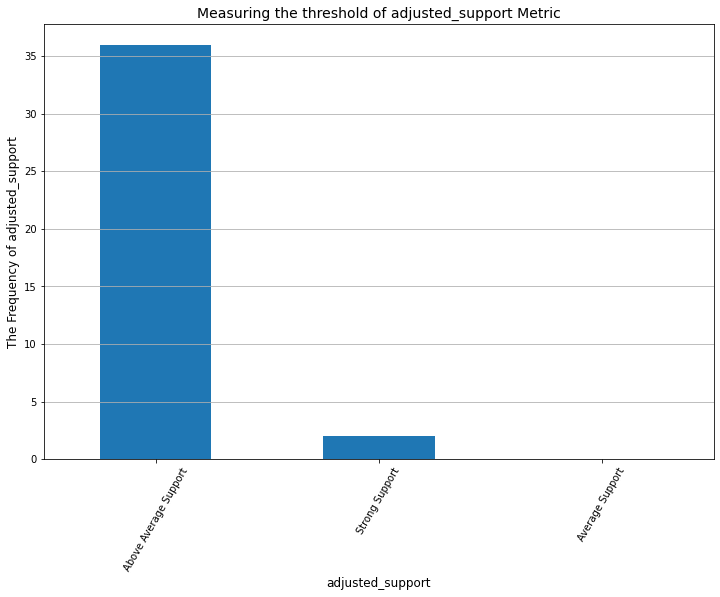

In [27]:
#import the matplotlib library:
import matplotlib.pyplot as plt

#create the cut function:
bins = [0, 0.001, 0.0013, 0.0015]
labels = ["Average Support","Above Average Support","Strong Support"]
rules_without_staples['adjusted_support'] = pd.cut(rules_without_staples["support"], bins=bins, labels=labels)

#create meaning explorations:
def bar_plot(arg):
    plt.figure(figsize=(12,8))
    arg.value_counts().plot.bar()
    plt.title(f"Measuring the threshold of {arg.name} Metric",fontsize=14)
    plt.xlabel(f"{arg.name}",fontsize=12)
    plt.ylabel(f"The Frequency of {arg.name}",fontsize=12)
    plt.xticks(rotation=60)
    plt.grid(axis='y')
    plt.show()

# plot the support ratio threshold based on simple criteria 
# [average support % - above average support % - strong support %]
bar_plot(rules_without_staples['adjusted_support'])

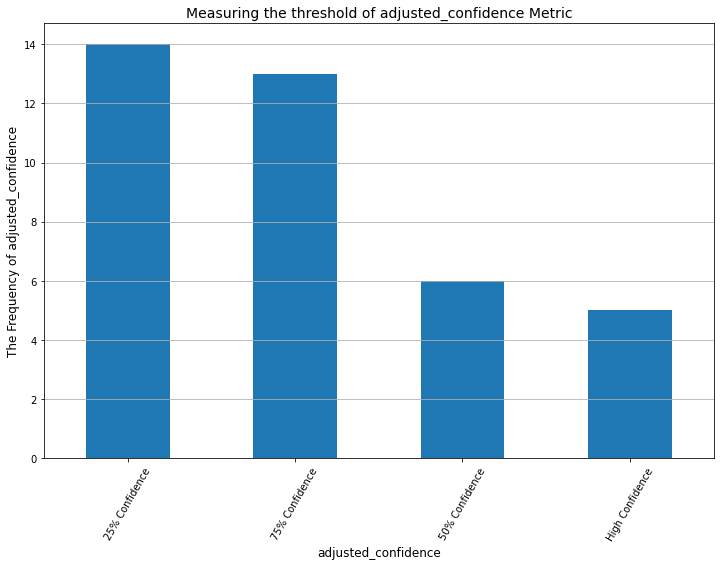

In [28]:
#create the cut function: 
# Here I've applied the quantile aspect for equality measurement

bins = [0, 0.07, 0.09, 0.15, 0.28]
labels = ["25% Confidence","50% Confidence","75% Confidence","High Confidence"]
rules_without_staples['adjusted_confidence'] = pd.cut(rules_without_staples["confidence"], bins=bins, labels=labels)

bar_plot(rules_without_staples['adjusted_confidence'])

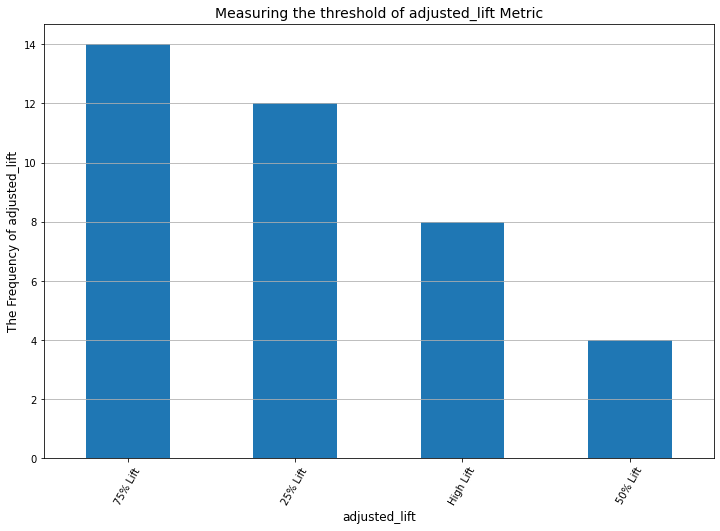

In [29]:
## lift ratio
bins = [0, 7, 8, 11, 34]
labels = ["25% Lift","50% Lift","75% Lift","High Lift"]
rules_without_staples['adjusted_lift'] = pd.cut(rules_without_staples["lift"], bins=bins, labels=labels)

bar_plot(rules_without_staples['adjusted_lift'])

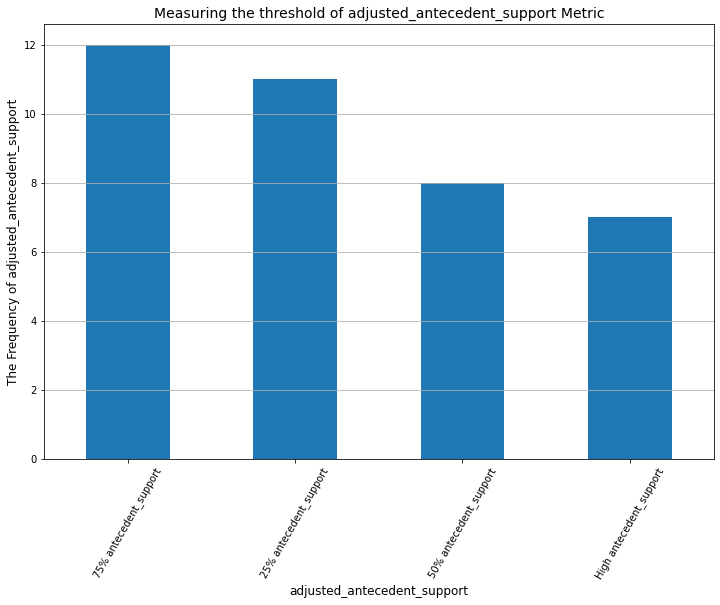

In [30]:
## antecedent_support ratio
bins = [0, 0.008, 0.014, 0.017, 0.02]
labels = ["25% antecedent_support","50% antecedent_support","75% antecedent_support","High antecedent_support"]
rules_without_staples['adjusted_antecedent_support'] = pd.cut(rules_without_staples["antecedent support"], bins=bins, labels=labels)

bar_plot(rules_without_staples['adjusted_antecedent_support'])

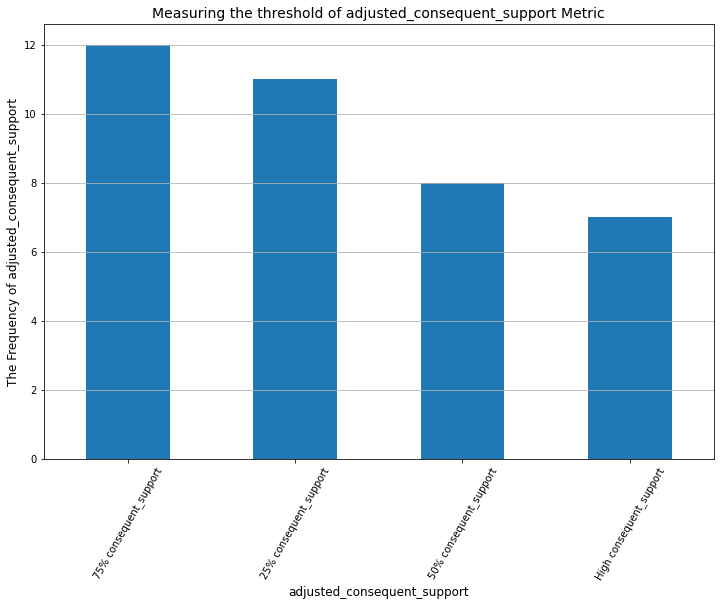

In [31]:
## antecedent_support ratio
bins = [0, 0.008, 0.014, 0.017, 0.02]
labels = ["25% consequent_support","50% consequent_support","75% consequent_support","High consequent_support"]
rules_without_staples['adjusted_consequent_support'] = pd.cut(rules_without_staples["consequent support"], bins=bins, labels=labels)

bar_plot(rules_without_staples['adjusted_consequent_support'])

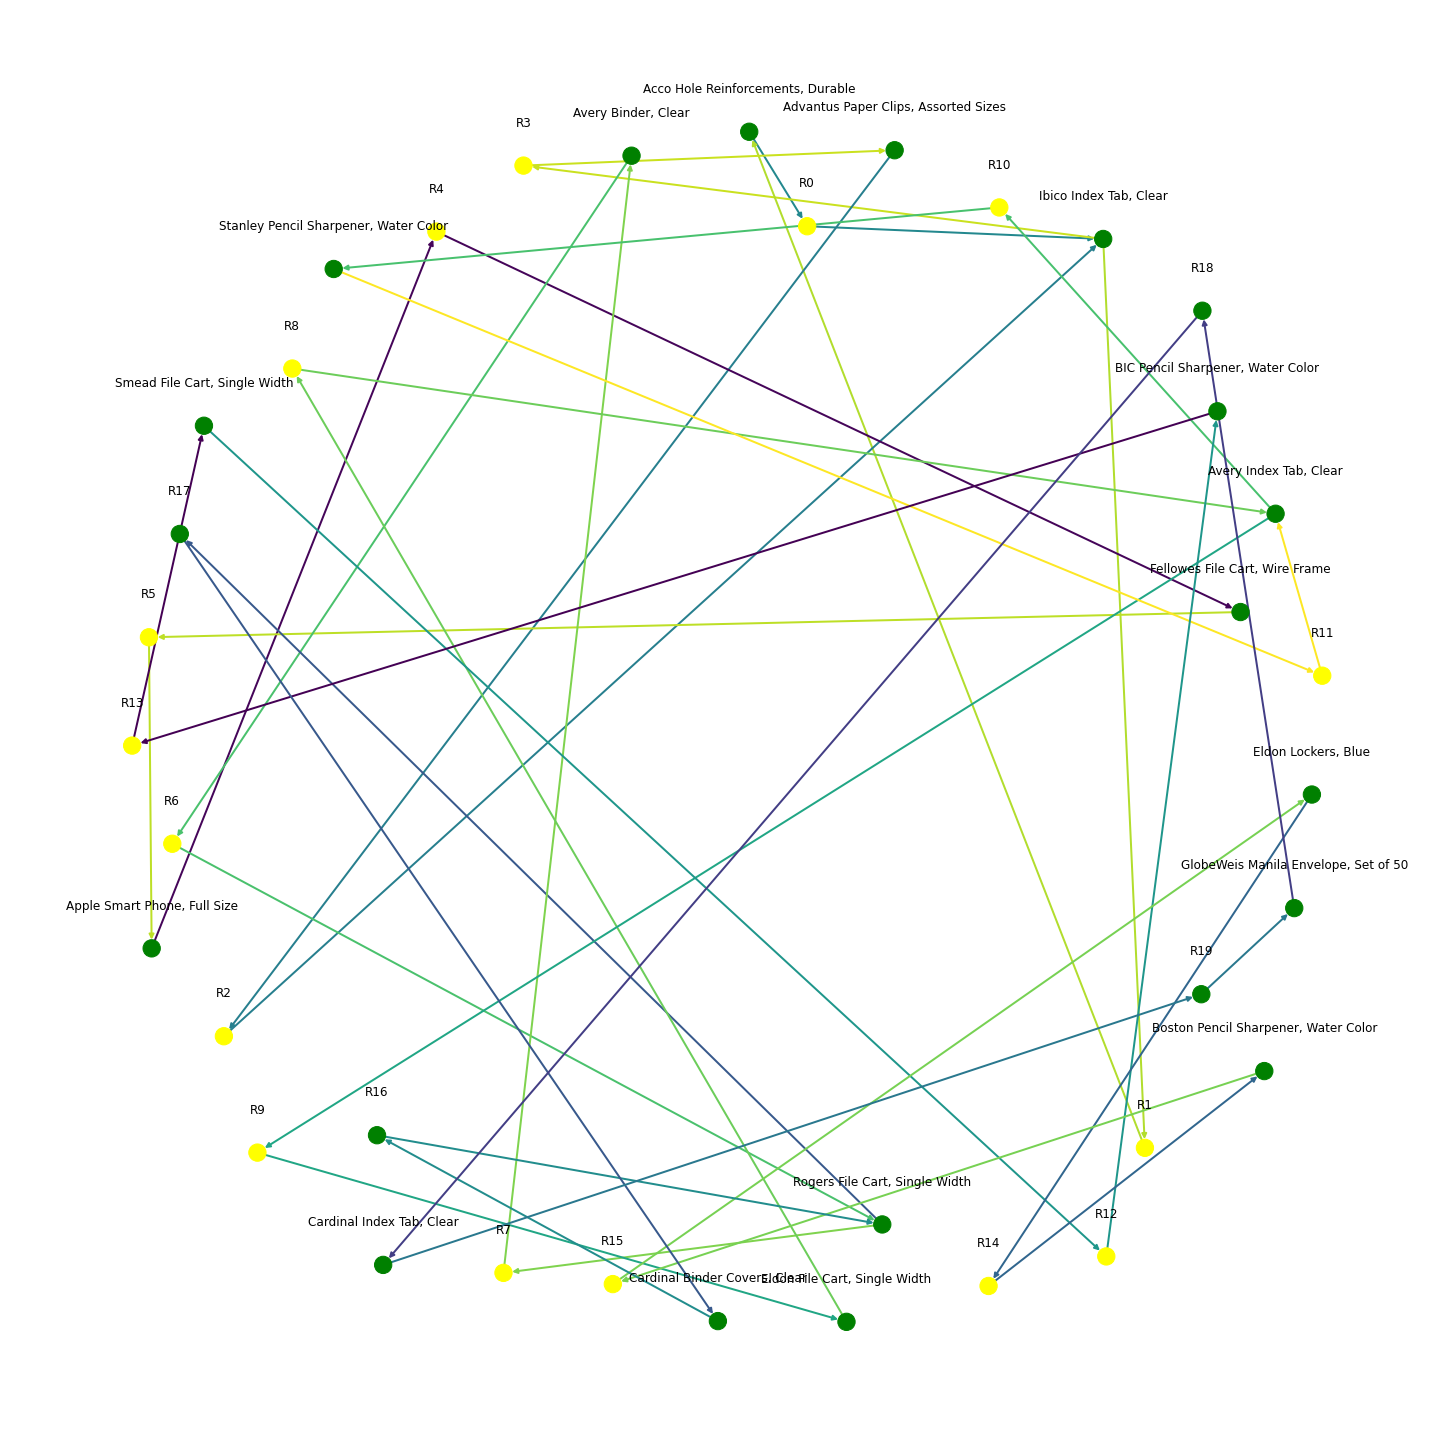

In [32]:
# I'll use this dataframe [frequent_itemsets_without_staples] & [rules_without_staples]
import networkx as nx  

'''a function to build a network diagram connecting antecedents and consequents'''

def draw_graph(rules, rules_to_show):
    import networkx as nx  

    G1 = nx.DiGraph()
   
    color_map=[]
    N = 50
    colors = np.random.rand(N)    
    strs=['R0', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11','R12','R13','R14','R15']   

    for i in range(rules_to_show):
        G1.add_nodes_from(["R"+str(i)])
    
     
        for a in rules.iloc[i]['antecedents']:
            G1.add_nodes_from([a])
            G1.add_edge(a, "R"+str(i), color=colors[i] , weight = 2)
       
        for c in rules.iloc[i]['consequents']:
            G1.add_nodes_from([a])
            G1.add_edge("R"+str(i), c, color=colors[i],  weight=2)
    for node in G1:
        found_a_string = False
        for item in strs:
            if node==item:
                found_a_string = True
        if found_a_string:
            color_map.append('yellow')
        else:
            color_map.append('green')       
 
 
   
    edges = G1.edges()
    colors = [G1[u][v]['color'] for u,v in edges]
    weights = [G1[u][v]['weight'] for u,v in edges]
    plt.figure(figsize = (20,20))
    pos = nx.spring_layout(G1, k=16, scale=1)
    nx.draw(G1, pos, node_color = color_map, edge_color=colors, width=weights, font_size=13, with_labels=False)            
   # edges=edges,
    for p in pos:  # raise text positions
        pos[p][1] += 0.07
    nx.draw_networkx_labels(G1, pos)
    plt.show()

#Calling function with 10 rules
draw_graph(rules_without_staples, 20)

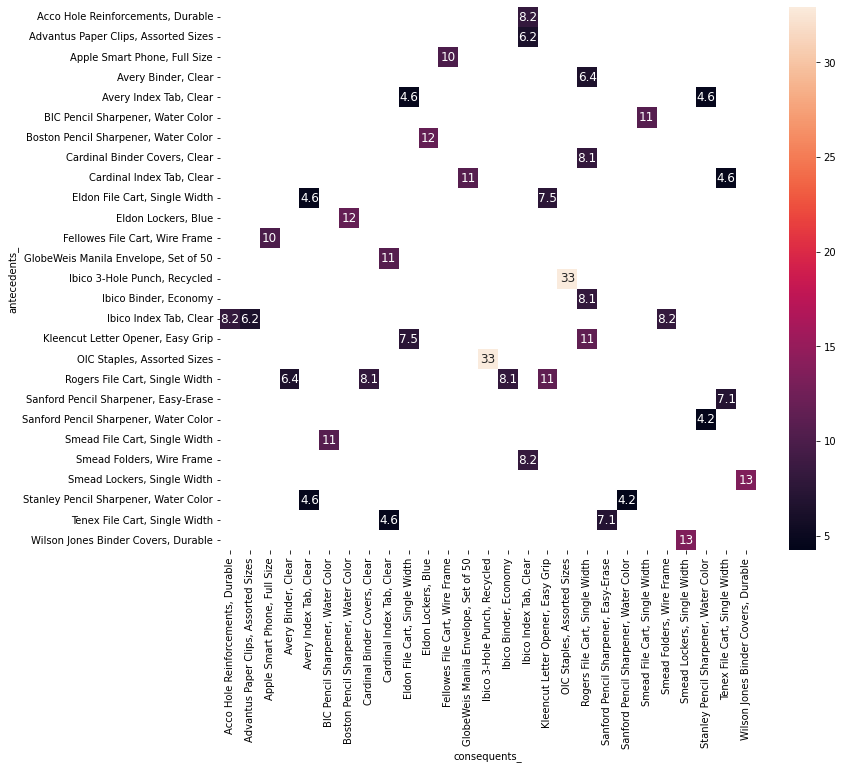

In [33]:
rules_without_staples['lhs items'] = rules_without_staples['antecedents'].apply(lambda x:len(x) )
rules_without_staples[rules_without_staples['lhs items']>0.01].sort_values('lift', ascending=False).head()


# Replace frozen sets with strings
rules_without_staples['antecedents_'] = rules_without_staples['antecedents'].apply(lambda a: ','.join(list(a)))
rules_without_staples['consequents_'] = rules_without_staples['consequents'].apply(lambda a: ','.join(list(a)))

# Transform the DataFrame of rules into a matrix using the lift metric
pivot = rules_without_staples[rules_without_staples['lhs items']>0.01].pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'lift')


# Replace frozen sets with strings
rules_without_staples['antecedents_'] = rules_without_staples['antecedents'].apply(lambda a: ','.join(list(a)))
rules_without_staples['consequents_'] = rules_without_staples['consequents'].apply(lambda a: ','.join(list(a)))

# Transform the DataFrame of rules into a matrix using the lift metric
pivot = rules_without_staples[rules_without_staples['lhs items']>0.01].pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'lift')

import seaborn as sns
# Generate a heatmap with annotations on and the colorbar off

plt.figure(figsize=(12,10))
sns.heatmap(pivot, annot = True,annot_kws={"fontsize":12})
plt.yticks(rotation=0)
plt.xticks(rotation=90)
#plt.grid(True)
plt.show()

In [34]:
antecedents_ = []
consequents_ = []
values = []
for i in pivot:
    g = pivot.loc[pivot[i].isnull() == False,i]
    df1 = g.to_frame().transpose()
    if len(np.round(g.values, 6))>1:
        for j in g.index:
            antecedents_.append(i)
            consequents_.append(j)
        for l in np.round(g.values, 6):
            values.append(l)
    else:
        antecedents_.append(i)
        consequents_.append(g.index[0])
        values.append(np.round(g.values, 6)[0])

    
    #g.to_csv('itemss.csv',index=False)
    
# iloc[start:stop:step/stride]
#https://stackoverflow.com/questions/63840290/indexing-in-python-dataframe-using-iloc-to-select-all-columns-except-the-first-c
    
# Links:
# https://stackoverflow.com/questions/30787901/how-to-get-a-value-from-a-pandas-dataframe-and-not-the-index-and-object-type
# https://stackoverflow.com/questions/56026858/different-format-of-dataframe-with-loc-and-to-frame

In [35]:
# using the results highlighted in the previous for loop to build-up the dataframe

test_df = pd.DataFrame(columns=['antecedents_', 'consequents_', 'values'])

#identifying the columns
test_df['antecedents_'] = antecedents_
test_df['consequents_'] = consequents_
test_df['values'] = values
test_df['first_recommendation'] = ['Staples' for i in range(len(test_df))] #Staples exist to all items!!

#check the final results:
#test_df

In [36]:
temp = test_df[["antecedents_", "consequents_"]]
#temp

In [37]:
new_grouping = pd.DataFrame({"antecedents_": temp.antecedents_.unique().tolist(), "consequents_": temp.groupby('antecedents_', as_index=False).apply(lambda x: x['consequents_'].unique())})
new_grouping["first_recommendation"] = ["Staples" for i in range(len(new_grouping))]
#new_grouping

In [38]:
#
antecedents_products = new_grouping.antecedents_.tolist()
#antecedents_products

In [39]:
new_dataFrame = pd.DataFrame(columns = ["customerId", "antecedents_", "consequents_", "first_recommendation"])

In [40]:
customerIdList = []
antecedents_List = []
consequents_List = []
first_recommendationList = []

for i in range(len(df)):
    if df.ProductName[i] in antecedents_products:
        index = antecedents_products.index(df.ProductName[i])
        customerIdList.append(df.CustomerID[i])
        antecedents_List.append(new_grouping.iloc[index].antecedents_)
        consequents_List.append(new_grouping.iloc[index].consequents_.tolist())
        first_recommendationList.append(new_grouping.iloc[index].first_recommendation)
    else:
        customerIdList.append(df.CustomerID[i])
        antecedents_List.append(df.ProductName[i])
        consequents_List.append("")
        first_recommendationList.append("Staples")

new_dataFrame["customerId"] = customerIdList
new_dataFrame["antecedents_"] = antecedents_List
new_dataFrame["consequents_"] = consequents_List
new_dataFrame["first_recommendation"] = first_recommendationList

In [44]:
#new_dataFrame[new_dataFrame['antecedents_'] == 'Sanford Pencil Sharpener, Easy-Erase']
#new_dataFrame.info()

for i in new_dataFrame:
    new_dataFrame[i] = new_dataFrame[i].astype('string')
print(new_dataFrame.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   customerId            51290 non-null  string
 1   antecedents_          51290 non-null  string
 2   consequents_          51290 non-null  string
 3   first_recommendation  51290 non-null  string
dtypes: string(4)
memory usage: 1.6 MB
None


In [45]:
from sklearn import preprocessing 

label_encoder = preprocessing.LabelEncoder() 
new_dataFrame['consequents_values']= label_encoder.fit_transform(new_dataFrame['consequents_']) 

#new_dataFrame['consequents_values'].value_counts()

In [46]:
df['antecedents_'] = np.where(new_dataFrame['customerId'] == df['CustomerID'],new_dataFrame['antecedents_'],0)
df['consequents_values'] = np.where(new_dataFrame['customerId'] == df['CustomerID'],new_dataFrame['consequents_values'],0)
df['main_recommendation'] = np.where(new_dataFrame['customerId'] == df['CustomerID'],new_dataFrame['first_recommendation'],0)
#df[df['antecedents_'] == 0] # success


In [47]:
X_test = df[df['consequents_values'] == 0]
X_test.drop(['CustomerID','ProductName','antecedents_','main_recommendation'],axis=1,inplace=True)
#X_test

/tmp/ipykernel_14054/2990454360.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [48]:
X_train = df.loc[~(df['consequents_values'] == 0)]
X_train.drop(['CustomerID','ProductName','antecedents_','main_recommendation'],axis=1,inplace=True)
#X_train

/tmp/ipykernel_14054/4280183650.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [49]:
y_train = X_train['consequents_values']

In [50]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=23)
  
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=23)

In [51]:
# Generate the prediction values

y_predict = knn.predict(X_test)
print(y_predict)

[ 1  1  1 ...  1 10  8]


In [52]:
X_test["consequents_values"] = X_test.loc[X_test["consequents_values"] == 0, "consequents_values"] = y_predict
#X_test

/tmp/ipykernel_14054/949350580.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [53]:
new_dataFrame.consequents_values = new_dataFrame.consequents_values.astype(int)

In [54]:
df0 = pd.concat([X_train, X_test], 0, ignore_index=True)

/tmp/ipykernel_14054/3147098196.py:1: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.



In [55]:
# add the updated column:
df['consequents_values'] = np.where(((df0['Profit'] == df['Profit']) & (df0['ShippingCost'] == df['ShippingCost']) & (df0['OrderPriority'] == df['OrderPriority'])),df0['consequents_values'],df0['consequents_values'])

In [56]:
new_dataFrame.consequents_values = df.consequents_values

In [57]:
# create dummy dataframe just to transition the variables correctly to the original dataframe "df"

data = pd.DataFrame(columns=['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18',
                            '19','20','21','22','23'])

Empty DataFrame
Columns: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
Index: []

[0 rows x 23 columns]

In [58]:
data['18']=np.where(new_dataFrame['consequents_values'] == 18,new_dataFrame['consequents_'].value_counts().index[1],"")
data['16']=np.where(new_dataFrame['consequents_values'] == 16,new_dataFrame['consequents_'].value_counts().index[2],"")
data['14']=np.where(new_dataFrame['consequents_values'] == 14,new_dataFrame['consequents_'].value_counts().index[3],"")
data['4']=np.where(new_dataFrame['consequents_values'] == 4,new_dataFrame['consequents_'].value_counts().index[4],"")
data['3']=np.where(new_dataFrame['consequents_values'] == 3,new_dataFrame['consequents_'].value_counts().index[5],"")
data['1']=np.where(new_dataFrame['consequents_values'] == 1,new_dataFrame['consequents_'].value_counts().index[6],"")
data['21']=np.where(new_dataFrame['consequents_values'] == 21,new_dataFrame['consequents_'].value_counts().index[7],"")
data['6']=np.where(new_dataFrame['consequents_values'] == 6,new_dataFrame['consequents_'].value_counts().index[8],"")
data['5']=np.where(new_dataFrame['consequents_values'] == 5,new_dataFrame['consequents_'].value_counts().index[9],"")
data['11']=np.where(new_dataFrame['consequents_values'] == 11,new_dataFrame['consequents_'].value_counts().index[10],"")
data['8']=np.where(new_dataFrame['consequents_values'] == 8,new_dataFrame['consequents_'].value_counts().index[11],"")
data['12']=np.where(new_dataFrame['consequents_values'] == 12,new_dataFrame['consequents_'].value_counts().index[12],"")
data['13']=np.where(new_dataFrame['consequents_values'] == 13,new_dataFrame['consequents_'].value_counts().index[13],"")
data['2']=np.where(new_dataFrame['consequents_values'] == 2,new_dataFrame['consequents_'].value_counts().index[14],"")
data['22']=np.where(new_dataFrame['consequents_values'] == 22,new_dataFrame['consequents_'].value_counts().index[15],"")
data['20']=np.where(new_dataFrame['consequents_values'] == 20,new_dataFrame['consequents_'].value_counts().index[16],"")
data['23']=np.where(new_dataFrame['consequents_values'] == 23,new_dataFrame['consequents_'].value_counts().index[17],"")
data['17']=np.where(new_dataFrame['consequents_values'] == 17,new_dataFrame['consequents_'].value_counts().index[18],"")
data['19']=np.where(new_dataFrame['consequents_values'] == 19,new_dataFrame['consequents_'].value_counts().index[19],"")
data['10']=np.where(new_dataFrame['consequents_values'] == 10,new_dataFrame['consequents_'].value_counts().index[20],"")
data['7']=np.where(new_dataFrame['consequents_values'] == 7,new_dataFrame['consequents_'].value_counts().index[21],"")
data['9']=np.where(new_dataFrame['consequents_values'] == 9,new_dataFrame['consequents_'].value_counts().index[22],"")
data['15']=np.where(new_dataFrame['consequents_values'] == 15,new_dataFrame['consequents_'].value_counts().index[23],"")

In [59]:
data1 = data[data.columns[0:]].apply(
    lambda x: ''.join(x.dropna().astype(str)),
    axis=1)

In [60]:
data1 = pd.DataFrame(data1)

In [61]:
newdata = data1.rename(columns={0: 'recommendation'}) 

In [62]:
newdata = newdata.astype('string')

In [63]:
df['recommendation'] = newdata['recommendation']

In [64]:
df.drop(['antecedents_','consequents_values'],axis=1,inplace=True)

In [65]:
df[['CustomerID','main_recommendation', 'recommendation']]

CustomerID main_recommendation  \
0       LS172304             Staples   
1       MV174854             Staples   
2       CS121304             Staples   
3       CS121304             Staples   
4       AP109154             Staples   
...          ...                 ...   
51285   AM103604             Staples   
51286   AM103604             Staples   
51287   HR147704             Staples   
51288   RM196754             Staples   
51289   FH143654             Staples   

                                          recommendation  
0                       ['Apple Smart Phone, Full Size']  
1                        ['OIC Staples, Assorted Sizes']  
2                       ['Apple Smart Phone, Full Size']  
3      ['Avery Index Tab, Clear', 'Sanford Pencil Sha...  
4                                ['Eldon Lockers, Blue']  
...                                                  ...  
51285  ['Acco Hole Reinforcements, Durable', 'Advantu...  
51286  ['Acco Hole Reinforcements, Durable', 'Advantu...  
51287  ['Acco Hole Reinforcements, Durable', 'Advantu...  
51288  ['Eldon File Cart, Single Width', 'Rogers File...  
51289  ['Cardinal Index Tab, Clear', 'Sanford Pencil ...  

[51290 rows x 3 columns]

In [66]:
df

CustomerID  Discount  OrderPriority  \
0       LS172304       0.0              2   
1       MV174854       0.0              3   
2       CS121304       0.0              3   
3       CS121304       0.0              3   
4       AP109154       0.0              2   
...          ...       ...            ...   
51285   AM103604       0.2              2   
51286   AM103604       0.2              2   
51287   HR147704       0.2              3   
51288   RM196754       0.2              1   
51289   FH143654       0.2              3   

                                             ProductName   Profit  Sales  \
0                                              Xerox 225   9.3312     19   
1              Wirebound Service Call Books, 5 1/2" x 4"   9.2928     19   
2      Adams Phone Message Book, Professional, 400 Me...   9.8418     21   
3                                             Xerox 1913  53.2608    111   
4                                              Xerox 223   3.1104      6   
...                                                  ...      ...    ...   
51285                   Satellite Sectional Post Binders  22.5732     69   
51286                                            Staples   3.1584      9   
51287                          GBC Plastic Binding Combs   4.2804     12   
51288                       Vinyl Sectional Post Binders  33.9300     90   
51289          GBC DocuBind P50 Personal Binding Machine  51.8238    154   

       Segment  ShipMode  ShippingCost  Year  ...  Rating  Market_APAC  \
0            0         2          4.37  2011  ...       2            0   
1            0         0          0.94  2011  ...       2            0   
2            0         0          1.81  2011  ...       2            0   
3            0         0          4.59  2011  ...       2            0   
4            0         0          1.32  2011  ...       1            0   
...        ...       ...           ...   ...  ...     ...          ...   
51285        1         3          5.15  2014  ...       2            0   
51286        1         3          0.44  2014  ...       4            0   
51287        2         1          0.31  2014  ...       2            0   
51288        2         1         15.95  2014  ...       2            0   
51289        1         0          9.59  2014  ...       2            0   

       Market_Africa  Market_Canada  Market_EMEA  Market_EU  Market_LATAM  \
0                  0              0            0          0             0   
1                  0              0            0          0             0   
2                  0              0            0          0             0   
3                  0              0            0          0             0   
4                  0              0            0          0             0   
...              ...            ...          ...        ...           ...   
51285              0              0            0          0             0   
51286              0              0            0          0             0   
51287              0              0            0          0             0   
51288              0              0            0          0             0   
51289              0              0            0          0             0   

       Market_US  main_recommendation  \
0              1              Staples   
1              1              Staples   
2              1              Staples   
3              1              Staples   
4              1              Staples   
...          ...                  ...   
51285          1              Staples   
51286          1              Staples   
51287          1              Staples   
51288          1              Staples   
51289          1              Staples   

                                          recommendation  
0                       ['Apple Smart Phone, Full Size']  
1                        ['OIC Staples, Assorted Sizes']  
2                       ['Apple Smart Phone, Full Size']  
3      ['

******


<h6 style="background-color:#f9f1fe; color:#000; font-size:18px; padding:20px; text-align:center; border-radius:15px; font-family:'Verdana', sans-serif;"> FP-Growth Algorithm </h6>
    

In [67]:
# create top items

top_items = df.groupby("ProductName")['Rating'].sum().sort_values(ascending=False).to_frame().reset_index().head(50)

In [68]:
# create top items

top_items = df.groupby("ProductName")['Rating'].sum().sort_values(ascending=False).to_frame().reset_index().head(50)

#download it as image and include it in references

# importing required module
import plotly.express as px
# to have a same origin
top_items["all"] = "Top 50 items" 
# creating tree map using plotly

fig = px.treemap(top_items.head(50), path=['all', "ProductName"], values='Rating',
                  color=top_items["Rating"].head(50), hover_data=['ProductName'],
                  color_continuous_scale='Blues',
                )
# ploting the treemap
fig.show() 

In [69]:
#download it as image and include it in references

# importing required module
import plotly.express as px
# to have a same origin
top_items["all"] = "Top 50 items" 
# creating tree map using plotly

fig = px.treemap(top_items.head(50), path=['all', "ProductName"], values='Rating',
                  color=top_items["Rating"].head(50), hover_data=['ProductName'],
                  color_continuous_scale='Blues',
                )
# ploting the treemap
fig.show() 

In [70]:
#select the required columns
fp_growth = df.pivot_table(index='CustomerID',columns='ProductName',values='Rating')

In [71]:
fp_growth.fillna(0,inplace = True) #in case there're missing values

In [72]:
# rating_matrix implementation

def rating_matrix(item_frequency):
    start = 0
    if item_frequency > 0:
        start = 1
    return start
    
rating_matrix_fp_growth = fp_growth.applymap(rating_matrix)

In [73]:
# recall the important mlxtend libraries
# it's very accessible library for association rules techniques, such as Apriori, Fp-Growth, FP-Max and 
# the good side is the programmer are stand-by to keep adding and modifying the library.
# additionally, it reflects accurate results, and easy to apply data manipulation methods without 
# learning sophisticated methods or applying other libraries here. Only mlxtend is needed to generate results.

from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules

#The FP-Growth Algorithm
frequent_itemsets_fp = fpgrowth(rating_matrix_fp_growth, min_support=0.001,use_colnames=True)
rules_fp_growth = association_rules(frequent_itemsets_fp, metric="lift")
rules_fp_growth

antecedents  \
0                      (Tenex File Cart, Single Width)   
1                          (Cardinal Index Tab, Clear)   
2              (Tennsco 6- and 18-Compartment Lockers)   
3                                            (Staples)   
4                  (Acco Hole Reinforcements, Durable)   
5                             (Ibico Index Tab, Clear)   
6                     (Master Caster Door Stop, Brown)   
7                                            (Staples)   
8              (Sanford Pencil Sharpener, Water Color)   
9              (Stanley Pencil Sharpener, Water Color)   
10                    (Rogers File Cart, Single Width)   
11                             (Ibico Binder, Economy)   
12                                        (Xerox 1881)   
13                                           (Staples)   
14                                           (Staples)   
15                      (Strathmore Photo Mount Cards)   
16                                           (Staples)   
17                    (Logitech G600 MMO Gaming Mouse)   
18                            (Avery Index Tab, Clear)   
19             (Stanley Pencil Sharpener, Water Color)   
20                     (Eldon File Cart, Single Width)   
21                            (Avery Index Tab, Clear)   
22                            (GBC Wire Binding Combs)   
23                                           (Staples)   
24                                           (Staples)   
25                            (Flat Face Poster Frame)   
26                                           (Staples)   
27                                        (Xerox 1893)   
28                     (Smead File Cart, Single Width)   
29                 (BIC Pencil Sharpener, Water Color)   
30                      (Apple Smart Phone, Full Size)   
31                    (Fellowes File Cart, Wire Frame)   
32                       (Smead Lockers, Single Width)   
33               (Wilson Jones Binder Covers, Durable)   
34                               (Avery Binder, Clear)   
35                    (Rogers File Cart, Single Width)   
36              (Advantus Paper Clips, Assorted Sizes)   
37                            (Ibico Index Tab, Clear)   
38                 (Kleencut Letter Opener, Easy Grip)   
39                    (Rogers File Cart, Single Width)   
40                 (Kleencut Letter Opener, Easy Grip)   
41                     (Eldon File Cart, Single Width)   
42                     (Cardinal Binder Covers, Clear)   
43                    (Rogers File Cart, Single Width)   
44                                           (Staples)   
45                           (Storex Dura Pro Binders)   
46                                           (Staples)   
47        (GBC DocuBind TL300 Electric Binding System)   
48                       (OIC Staples, Assorted Sizes)   
49                      (Ibico 3-Hole Punch, Recycled)   
50                               (Eldon Lockers, Blue)   
51              (Boston Pencil Sharpener, Water Color)   
52                                           (Staples)   
53                             (Digium D40 VoIP phone)   
54   (I Need's 3d Hello Kitty Hybrid Silicone Case ...   
55                                           (Staples)   
56                                           (Staples)   
57   (Acco Pressboard Covers with Storage Hooks, 14...   
58                                           (Staples)   
59                           (Avery Non-Stick Binders)   
60                (Chromcraft Round Conference Tables)   
61                                           (Staples)   
62                            (Hon GuestStacker Chair)   
63                                           (Staples)   
64                                           (Staples)   
65                           (GBC VeloBind Cover Sets)   
66                         (Smead Folders, Wire Frame)   
67                            (Ibico Index Tab, Clear)   
68                        (KI Adjustable-

In [74]:
# moving to the next level on finding unique itemsets.
df_without_staples = df[df['ProductName'] != 'Staples']

#repeating this important steps!
fp_growth_without_staples = df_without_staples.pivot_table(index='CustomerID',columns='ProductName',values='Rating')
fp_growth_without_staples.fillna(0,inplace=True)

def rating_matrix_without_staples(item_frequency):
    res=0
    if item_frequency > 0:
        res=1
    return res

# execute the results after exploiting the rating matrix
basket_input_without_staples = fp_growth_without_staples.applymap(rating_matrix_without_staples)

In [75]:
# here when we execute the FP-Growth function with the respect to the support threshold
frequent_itemsets_fp_without_staples = fpgrowth(basket_input_without_staples,min_support=0.001,use_colnames=True)

# applying the association rules techniques to display the unqiue values
fp_growth_rules_without_staples = association_rules(frequent_itemsets_fp_without_staples,metric='lift')
#fp_growth_rules_without_staples

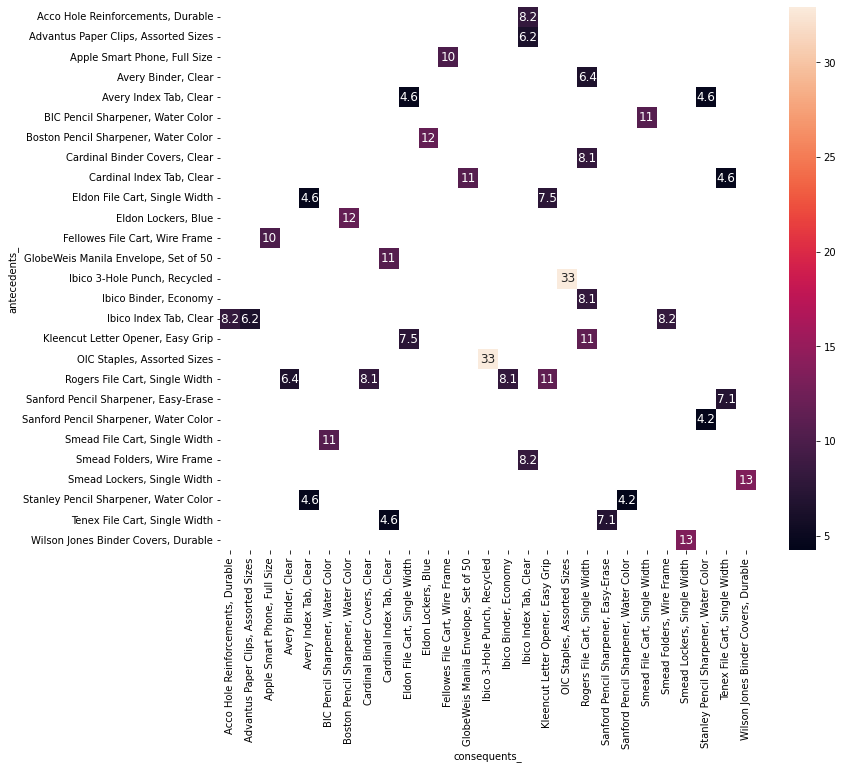

In [76]:
fp_growth_rules_without_staples['lhs items'] = fp_growth_rules_without_staples['antecedents'].apply(lambda x:len(x) )
fp_growth_rules_without_staples[fp_growth_rules_without_staples['lhs items']>0.01].sort_values('lift', ascending=False).head()


# Replace frozen sets with strings
fp_growth_rules_without_staples['antecedents_'] = fp_growth_rules_without_staples['antecedents'].apply(lambda a: ','.join(list(a)))
fp_growth_rules_without_staples['consequents_'] = fp_growth_rules_without_staples['consequents'].apply(lambda a: ','.join(list(a)))

# Transform the DataFrame of rules into a matrix using the lift metric
pivot = fp_growth_rules_without_staples[fp_growth_rules_without_staples['lhs items']>0.01].pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'lift')


# Replace frozen sets with strings
fp_growth_rules_without_staples['antecedents_'] = fp_growth_rules_without_staples['antecedents'].apply(lambda a: ','.join(list(a)))
fp_growth_rules_without_staples['consequents_'] = fp_growth_rules_without_staples['consequents'].apply(lambda a: ','.join(list(a)))

# Transform the DataFrame of rules into a matrix using the lift metric
pivot = fp_growth_rules_without_staples[fp_growth_rules_without_staples['lhs items']>0.01].pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'lift')

import seaborn as sns
# Generate a heatmap with annotations on and the colorbar off

plt.figure(figsize=(12,10))
sns.heatmap(pivot, annot = True,annot_kws={"fontsize":12})
plt.yticks(rotation=0)
plt.xticks(rotation=90)
#plt.grid(True)
plt.show()

In [77]:
antecedents_ = []
consequents_ = []
values = []
for i in pivot:
    g = pivot.loc[pivot[i].isnull() == False,i]
    df1 = g.to_frame().transpose()
    if len(np.round(g.values, 6))>1:
        for j in g.index:
            antecedents_.append(i)
            consequents_.append(j)
        for l in np.round(g.values, 6):
            values.append(l)
    else:
        antecedents_.append(i)
        consequents_.append(g.index[0])
        values.append(np.round(g.values, 6)[0])

    
    #g.to_csv('itemss.csv',index=False)
    
# iloc[start:stop:step/stride]
#https://stackoverflow.com/questions/63840290/indexing-in-python-dataframe-using-iloc-to-select-all-columns-except-the-first-c
    
# Links:
# https://stackoverflow.com/questions/30787901/how-to-get-a-value-from-a-pandas-dataframe-and-not-the-index-and-object-type
# https://stackoverflow.com/questions/56026858/different-format-of-dataframe-with-loc-and-to-frame

In [78]:
# using the results highlighted in the previous for loop to build-up the dataframe

test_df_fp_growth = pd.DataFrame(columns=['antecedents_', 'consequents_', 'values'])

#identifying the columns
test_df_fp_growth['antecedents_'] = antecedents_
test_df_fp_growth['consequents_'] = consequents_
test_df_fp_growth['values'] = values
test_df_fp_growth['first_recommendation'] = ['Staples' for i in range(len(test_df_fp_growth))] 
#Staples exist to all items!!

#check the final results:
#test_df

In [79]:
temp_fp_growth = test_df_fp_growth[["antecedents_", "consequents_"]]

new_grouping_fp_growth = pd.DataFrame({"antecedents_": temp_fp_growth.antecedents_.unique().tolist(), "consequents_": temp_fp_growth.groupby('antecedents_', as_index=False).apply(lambda x: x['consequents_'].unique())})
new_grouping_fp_growth["first_recommendation"] = ["Staples" for i in range(len(new_grouping_fp_growth))]
#new_grouping

In [80]:
antecedents_products = new_grouping_fp_growth.antecedents_.tolist()
#antecedents_products

In [81]:
new_dataFrame_fp_growth = pd.DataFrame(columns = ["customerId", "antecedents_", "consequents_", "first_recommendation"])

In [82]:
customerIdList = []
antecedents_List = []
consequents_List = []
first_recommendationList = []

for i in range(len(df)):
    if df.ProductName[i] in antecedents_products:
        index = antecedents_products.index(df.ProductName[i])
        customerIdList.append(df.CustomerID[i])
        antecedents_List.append(new_grouping_fp_growth.iloc[index].antecedents_)
        consequents_List.append(new_grouping_fp_growth.iloc[index].consequents_.tolist())
        first_recommendationList.append(new_grouping_fp_growth.iloc[index].first_recommendation)
    else:
        customerIdList.append(df.CustomerID[i])
        antecedents_List.append(df.ProductName[i])
        consequents_List.append("")
        first_recommendationList.append("Staples")

new_dataFrame_fp_growth["customerId"] = customerIdList
new_dataFrame_fp_growth["antecedents_"] = antecedents_List
new_dataFrame_fp_growth["consequents_"] = consequents_List
new_dataFrame_fp_growth["first_recommendation"] = first_recommendationList

In [83]:
#new_dataFrame[new_dataFrame['antecedents_'] == 'Sanford Pencil Sharpener, Easy-Erase']
#new_dataFrame.info()

for i in new_dataFrame_fp_growth:
    new_dataFrame_fp_growth[i] = new_dataFrame_fp_growth[i].astype('string')

#make sure the code is working!
new_dataFrame_fp_growth.info()  
# for col_name, col_type in zip(new_dataFrame.columns, new_dataFrame.dtypes):
#    if col_type == "object":
#        new_dataFrame[i] = new_dataFrame[i].astype('string')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   customerId            51290 non-null  string
 1   antecedents_          51290 non-null  string
 2   consequents_          51290 non-null  string
 3   first_recommendation  51290 non-null  string
dtypes: string(4)
memory usage: 1.6 MB


In [84]:
from sklearn import preprocessing 

label_encoder = preprocessing.LabelEncoder() 
new_dataFrame_fp_growth['consequents_values']= label_encoder.fit_transform(new_dataFrame_fp_growth['consequents_']) 

#new_dataFrame['consequents_values'].value_counts()

In [85]:
df['antecedents_'] = np.where(new_dataFrame_fp_growth['customerId'] == df['CustomerID'],new_dataFrame_fp_growth['antecedents_'],0)
df['consequents_values'] = np.where(new_dataFrame_fp_growth['customerId'] == df['CustomerID'],new_dataFrame_fp_growth['consequents_values'],0)
df['main_recommendation'] = np.where(new_dataFrame_fp_growth['customerId'] == df['CustomerID'],new_dataFrame_fp_growth['first_recommendation'],0)
#df[df['antecedents_'] == 0] # success


In [93]:
X_test = df[df['consequents_values'] == 0]
X_test.drop(['CustomerID','ProductName','antecedents_','main_recommendation','recommendation'],axis=1,inplace=True)
#X_test

/tmp/ipykernel_14054/2824735233.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [94]:
X_train = df.loc[~(df['consequents_values'] == 0)]
X_train.drop(['CustomerID','ProductName','antecedents_','main_recommendation','recommendation'],axis=1,inplace=True)
#X_train

/tmp/ipykernel_14054/658688997.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [95]:
y_train = X_train['consequents_values']

In [107]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=23)
  
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=23)

In [108]:
# Generate the prediction values
y_predict = knn.predict(X_test)

print(y_predict)

[ 1  1  1 ...  1 10  8]


In [109]:
X_test["consequents_values"] = X_test.loc[X_test["consequents_values"] == 0, "consequents_values"] = y_predict
#X_test

/tmp/ipykernel_14054/949350580.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [110]:
new_dataFrame_fp_growth.consequents_values = new_dataFrame_fp_growth.consequents_values.astype(int)

In [111]:
df0 = pd.concat([X_train, X_test], 0, ignore_index=True)

/tmp/ipykernel_14054/3147098196.py:1: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.



In [112]:
# add the updated column:
df['consequents_values'] = np.where(((df0['Profit'] == df['Profit']) & (df0['ShippingCost'] == df['ShippingCost']) & (df0['OrderPriority'] == df['OrderPriority'])),df0['consequents_values'],df0['consequents_values'])

In [113]:
new_dataFrame_fp_growth.consequents_values = df.consequents_values

In [114]:
# create dummy dataframe just to transition the variables correctly to the original dataframe "df"
data = pd.DataFrame(columns=['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18',
                            '19','20','21','22','23'])

Empty DataFrame
Columns: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
Index: []

[0 rows x 23 columns]

In [115]:
data['18']=np.where(new_dataFrame_fp_growth['consequents_values'] == 18,new_dataFrame_fp_growth['consequents_'].value_counts().index[1],"")
data['16']=np.where(new_dataFrame_fp_growth['consequents_values'] == 16,new_dataFrame_fp_growth['consequents_'].value_counts().index[2],"")
data['14']=np.where(new_dataFrame_fp_growth['consequents_values'] == 14,new_dataFrame_fp_growth['consequents_'].value_counts().index[3],"")
data['4']=np.where(new_dataFrame_fp_growth['consequents_values'] == 4,new_dataFrame_fp_growth['consequents_'].value_counts().index[4],"")
data['3']=np.where(new_dataFrame_fp_growth['consequents_values'] == 3,new_dataFrame_fp_growth['consequents_'].value_counts().index[5],"")
data['1']=np.where(new_dataFrame_fp_growth['consequents_values'] == 1,new_dataFrame_fp_growth['consequents_'].value_counts().index[6],"")
data['21']=np.where(new_dataFrame_fp_growth['consequents_values'] == 21,new_dataFrame_fp_growth['consequents_'].value_counts().index[7],"")
data['6']=np.where(new_dataFrame_fp_growth['consequents_values'] == 6,new_dataFrame_fp_growth['consequents_'].value_counts().index[8],"")
data['5']=np.where(new_dataFrame_fp_growth['consequents_values'] == 5,new_dataFrame_fp_growth['consequents_'].value_counts().index[9],"")
data['11']=np.where(new_dataFrame_fp_growth['consequents_values'] == 11,new_dataFrame_fp_growth['consequents_'].value_counts().index[10],"")
data['8']=np.where(new_dataFrame_fp_growth['consequents_values'] == 8,new_dataFrame_fp_growth['consequents_'].value_counts().index[11],"")
data['12']=np.where(new_dataFrame_fp_growth['consequents_values'] == 12,new_dataFrame_fp_growth['consequents_'].value_counts().index[12],"")
data['13']=np.where(new_dataFrame_fp_growth['consequents_values'] == 13,new_dataFrame_fp_growth['consequents_'].value_counts().index[13],"")
data['2']=np.where(new_dataFrame_fp_growth['consequents_values'] == 2,new_dataFrame_fp_growth['consequents_'].value_counts().index[14],"")
data['22']=np.where(new_dataFrame_fp_growth['consequents_values'] == 22,new_dataFrame_fp_growth['consequents_'].value_counts().index[15],"")
data['20']=np.where(new_dataFrame_fp_growth['consequents_values'] == 20,new_dataFrame_fp_growth['consequents_'].value_counts().index[16],"")
data['23']=np.where(new_dataFrame_fp_growth['consequents_values'] == 23,new_dataFrame_fp_growth['consequents_'].value_counts().index[17],"")
data['17']=np.where(new_dataFrame_fp_growth['consequents_values'] == 17,new_dataFrame_fp_growth['consequents_'].value_counts().index[18],"")
data['19']=np.where(new_dataFrame_fp_growth['consequents_values'] == 19,new_dataFrame_fp_growth['consequents_'].value_counts().index[19],"")
data['10']=np.where(new_dataFrame_fp_growth['consequents_values'] == 10,new_dataFrame_fp_growth['consequents_'].value_counts().index[20],"")
data['7']=np.where(new_dataFrame_fp_growth['consequents_values'] == 7,new_dataFrame_fp_growth['consequents_'].value_counts().index[21],"")
data['9']=np.where(new_dataFrame_fp_growth['consequents_values'] == 9,new_dataFrame_fp_growth['consequents_'].value_counts().index[22],"")
data['15']=np.where(new_dataFrame_fp_growth['consequents_values'] == 15,new_dataFrame_fp_growth['consequents_'].value_counts().index[23],"")

In [116]:
data1 = data[data.columns[0:]].apply(
    lambda x: ''.join(x.dropna().astype(str)),
    axis=1)

In [117]:
data1 = pd.DataFrame(data1)

In [118]:
newdata = data1.rename(columns={0: 'recommendation'}) 

In [119]:
newdata = newdata.astype('string')

In [120]:
df['recommendation'] = newdata['recommendation']

In [121]:
df.drop(['antecedents_','consequents_values'],axis=1,inplace=True)

In [122]:
df[['CustomerID','main_recommendation', 'recommendation']]

CustomerID main_recommendation  \
0       LS172304             Staples   
1       MV174854             Staples   
2       CS121304             Staples   
3       CS121304             Staples   
4       AP109154             Staples   
...          ...                 ...   
51285   AM103604             Staples   
51286   AM103604             Staples   
51287   HR147704             Staples   
51288   RM196754             Staples   
51289   FH143654             Staples   

                                          recommendation  
0                       ['Apple Smart Phone, Full Size']  
1                        ['OIC Staples, Assorted Sizes']  
2                       ['Apple Smart Phone, Full Size']  
3      ['Avery Index Tab, Clear', 'Sanford Pencil Sha...  
4                                ['Eldon Lockers, Blue']  
...                                                  ...  
51285  ['Acco Hole Reinforcements, Durable', 'Advantu...  
51286  ['Acco Hole Reinforcements, Durable', 'Advantu...  
51287  ['Acco Hole Reinforcements, Durable', 'Advantu...  
51288  ['Eldon File Cart, Single Width', 'Rogers File...  
51289  ['Cardinal Index Tab, Clear', 'Sanford Pencil ...  

[51290 rows x 3 columns]

********